<a href="https://colab.research.google.com/github/FatemehAbediK/deep-learning-general/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#CNN-Mnist



In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#check

In [4]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

3


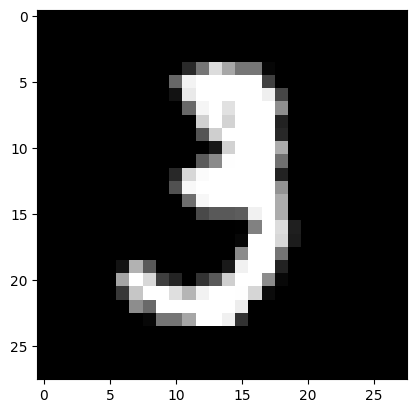

In [5]:
import matplotlib.pyplot as plt
print(y_train[10])
plt.imshow(x_train[10] , cmap='gray' )

In [6]:
#preprocessing

In [7]:
x_train = x_train.reshape((-1 , 28 , 28 ,1)).astype('float32')/255
x_test  =x_test.reshape((-1 , 28 , 28 ,1)).astype('float32')/255

In [8]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(filters=32 , kernel_size = (3,3) , strides=(1,1) , padding='valid' , activation='relu'  , input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128 , activation='relu' ))
model.add(keras.layers.Dense(units=10 , activation='softmax'))

model.compile(optimizer='adam' , loss=tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
hist= model.fit(x_train , y_train , epochs=20 , batch_size=128 , validation_data=(x_test , y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8978 - loss: 0.3425 - val_accuracy: 0.9779 - val_loss: 0.0664
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0557 - val_accuracy: 0.9844 - val_loss: 0.0518
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9917 - loss: 0.0286 - val_accuracy: 0.9824 - val_loss: 0.0495
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9948 - loss: 0.0171 - val_accuracy: 0.9846 - val_loss: 0.0476
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9972 - loss: 0.0101 - val_accuracy: 0.9840 - val_loss: 0.0512
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9850 - val_loss: 0.0532
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.9833 - val_loss: 0.0585
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.

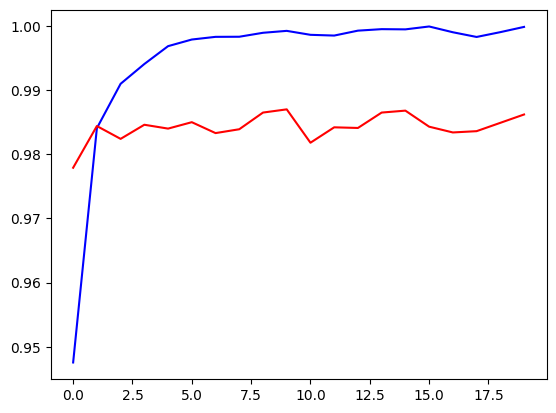

In [12]:
plt.plot(hist.history['accuracy'] , color='blue')
plt.plot(hist.history['val_accuracy'] , color='red')

# maxpooling 2d & averagepooling 2d

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [14]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [15]:
x_train = x_train.reshape((-1 , 28 , 28 ,1)).astype('float32')/255
x_test  =x_test.reshape((-1 , 28 , 28 ,1)).astype('float32')/255

In [17]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(128,kernel_size=(3,3) , strides=(1,1) , padding='valid' , activation='relu' , input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3) , strides=(1,1) , padding='valid' , activation='relu' ))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3) , strides=(1,1) , padding='valid' , activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=128 , activation= 'relu'))
model.add(keras.layers.Dense(units=64 , activation= 'relu'))

model.add(keras.layers.Dense(units=10 , activation='softmax'))

model.compile(optimizer='adam' , loss=tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,666 (416.66 KB)

 Trainable params: 106,666 (416.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist_1=model.fit(x_train , y_train , epochs=20 , batch_size=256 , validation_data=(x_test , y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6792 - loss: 1.0605 - val_accuracy: 0.9469 - val_loss: 0.1781
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9458 - loss: 0.1765 - val_accuracy: 0.9644 - val_loss: 0.1210
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9611 - loss: 0.1270 - val_accuracy: 0.9704 - val_loss: 0.0995
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9709 - loss: 0.0964 - val_accuracy: 0.9771 - val_loss: 0.0753
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9766 - loss: 0.0786 - val_accuracy: 0.9780 - val_loss: 0.0718
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9791 - loss: 0.0691 - val_accuracy: 0.9806 - val_loss: 0.0637
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9806 - loss: 0.0623 - val_accuracy: 0.9808 - val_loss: 0.0581
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9843 - loss: 0.0540 - val_accu

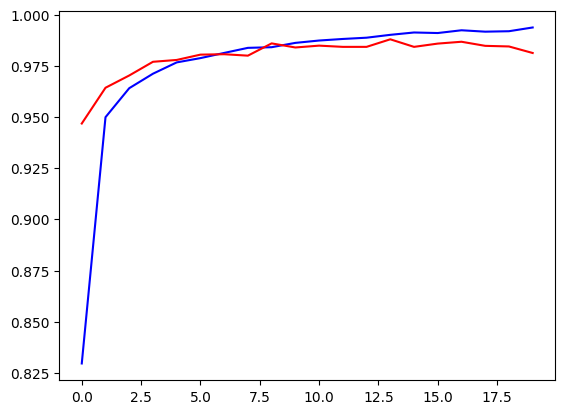

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist_1.history['accuracy'] , color='blue')
plt.plot(hist_1.history['val_accuracy'] , color='red')

#Batch Normalization

conv2d...BN...Activation...Maxpooling


In [24]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3) , strides=(1,1),input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,kernel_size=(3,3) , strides=(1,1),input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,kernel_size=(3,3) , strides=(1,1),input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=128 , activation= 'relu'))

model.add(keras.layers.Dense(units=10 , activation='softmax'))

model.compile(optimizer='adam' , loss=tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,714 (96.54 KB)

 Trainable params: 24,522 (95.79 KB)

 Non-trainable params: 192 (768.00 B)

In [25]:
hist_2=model.fit(x_train , y_train , epochs=20 , batch_size=256 , validation_data=(x_test , y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7909 - loss: 0.7913 - val_accuracy: 0.1142 - val_loss: 3.1721
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9753 - loss: 0.0810 - val_accuracy: 0.7669 - val_loss: 0.6387
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9833 - loss: 0.0536 - val_accuracy: 0.9746 - val_loss: 0.0864
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9869 - loss: 0.0431 - val_accuracy: 0.9800 - val_loss: 0.0622
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0347 - val_accuracy: 0.9768 - val_loss: 0.0800
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9803 - val_loss: 0.0646
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9938 - loss: 0.0215 - val_accuracy: 0.9847 - val_loss: 0.0550
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9942 - loss: 0.0183 - val_accuracy: 

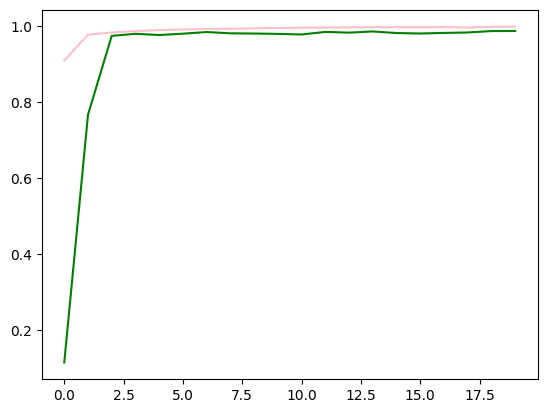

In [27]:

plt.plot(hist_2.history['accuracy'] , color='pink')
plt.plot(hist_2.history['val_accuracy'] , color='green')